 # MEDICAL COST PERSONAL - PREDICTION

## INTRODUCTION

>> The goal of this analysis is to use patient data to forecast the average medical care expenses for such population segments. These estimates could be used to create actuarial tables that set the price of yearly premiums higher or lower according to the expected treatment costs. (LANTZ, 2019)

The present dataset consists of seven variables related to medical expenses of American citizens. Such variables are **Age**, **Sex**, **BMI**, **Children**, **Smoker** and **Region**. We will use the linear regression technique to estimate medical expenses. We seek to answer questions such as the medical expenses of a 30-year-old non-smoker and childless woman living in the southeastern US.

## 1. IMPORTING AND PREPARING THE DATA

In [1]:
# Import the libraries
library(tidyverse)
library(summarytools)
library(PerformanceAnalytics)
library(caret)
library(ggResidpanel)
library(caTools)


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp

For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')


Attaching package: 'summarytools'


The following object is masked from 'package:tibble':

    view


Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'xts'


The following objects are masked from 'package:dplyr':

    first, last



Attaching package: 'Performanc

In [2]:
# Read the data
df_insurance<- read.csv("insurance.csv")

In [3]:
# Check for missing values
f=function(x){any(is.na(x))}
check.na=apply(df_insurance,2,f);
check.na

age      sex      bmi children   smoker   region  charges 
   FALSE    FALSE    FALSE    FALSE    FALSE    FALSE    FALSE

In [4]:
# Summary of dataset
summary(df_insurance)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

In [5]:
# Transform variables to factor
df_insurance$sex<- factor(df_insurance$sex)
df_insurance$smoker<- factor(df_insurance$smoker)
df_insurance$region<- factor(df_insurance$region)

In [6]:
# Display structure of dataset
str(df_insurance)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [7]:
# Visualising first six lines
head(df_insurance)

,age,sex,bmi,children,smoker,region,charges
,<int>,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


In [8]:
# Visualising last six lines
tail(df_insurance)

,age,sex,bmi,children,smoker,region,charges
,<int>,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>
1333,52,female,44.70,3,no,southwest,11411.685
1334,50,male,30.97,3,no,northwest,10600.548
1335,18,female,31.92,0,no,northeast,2205.981
1336,18,female,36.85,0,no,southeast,1629.833
1337,21,female,25.80,0,no,southwest,2007.945
1338,61,female,29.07,0,yes,northwest,29141.360


In [9]:
# Summary statistics
df_insurance %>%
summarytools::descr()

,age,bmi,charges,children
Mean,39.20702541,30.66339686,1.327042e+04,1.094918e+00
Std.Dev,14.04996038,6.09818691,1.211001e+04,1.205493e+00
Min,18.00000000,15.96000000,1.121874e+03,0.000000e+00
Q1,27.00000000,26.29000000,4.738268e+03,0.000000e+00
Median,39.00000000,30.40000000,9.382033e+03,1.000000e+00
Q3,51.00000000,34.70000000,1.665772e+04,2.000000e+00
Max,64.00000000,53.13000000,6.377043e+04,5.000000e+00
MAD,17.79120000,6.19726800,7.440809e+03,1.482600e+00
IQR,24.00000000,8.39750000,1.189963e+04,2.000000e+00
CV,0.35835313,0.19887513,9.125566e-01,1.100989e+00


## 2. EXPLORATORY DATA ANALISYS - MEDICAL EXPENSES

**DICTIONARY OF VARIABLES** <br>
**age:** Age of primary beneficiary. <br>
**sex:** Insurance contractor gender (female or male).  <br>
**bmi:** Body mass index.  <br>
**children:** Number of dependents.  <br>
**smoker:** Smoking. <br>
**region:** The beneficiary's residential area in the US.  <br>
**charges:** Individual medical costs billed by health insurance. 

### 2.1 VISUALIZATION OF VARIABLES

CHARGES -> The interesting variable is right-skewed, since mean have higher value than median.

In [10]:
# Summary variable Charges
summary(df_insurance$charges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 

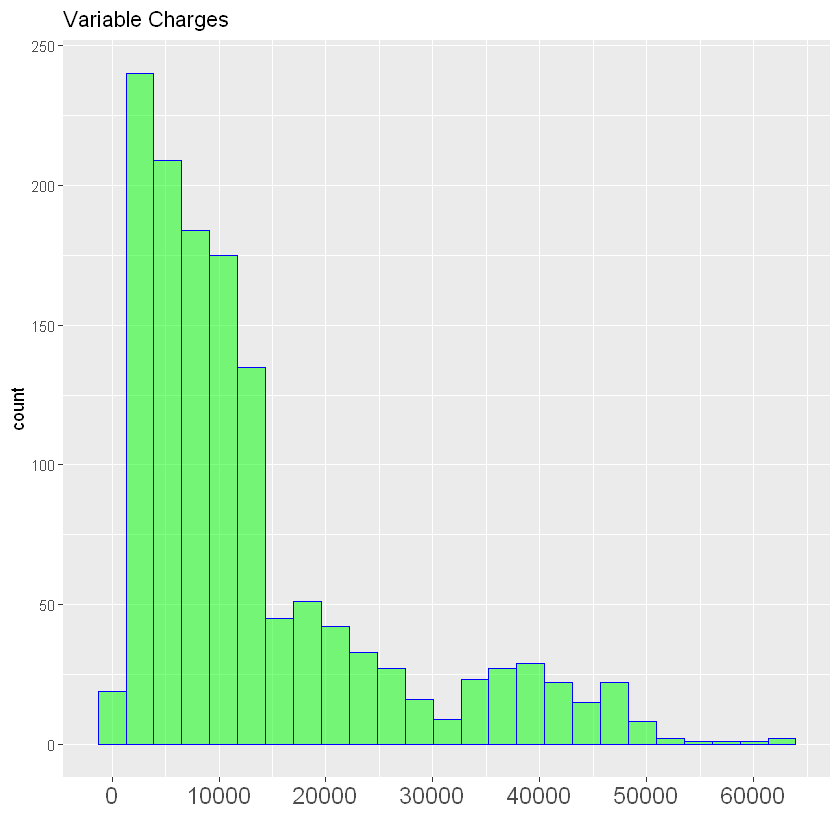

In [11]:
# Distribution Variable Charges
df_insurance %>%
ggplot(aes(charges)) +
geom_histogram(color = "blue", fill = "green",alpha = .5, bins = 25) +
scale_x_continuous(breaks = seq(0,64000,10000)) +
theme(axis.text.x = element_text(size = 14)) +
labs(title="Variable Charges", x="")

VARIABLES -> We can visualize the other variables.

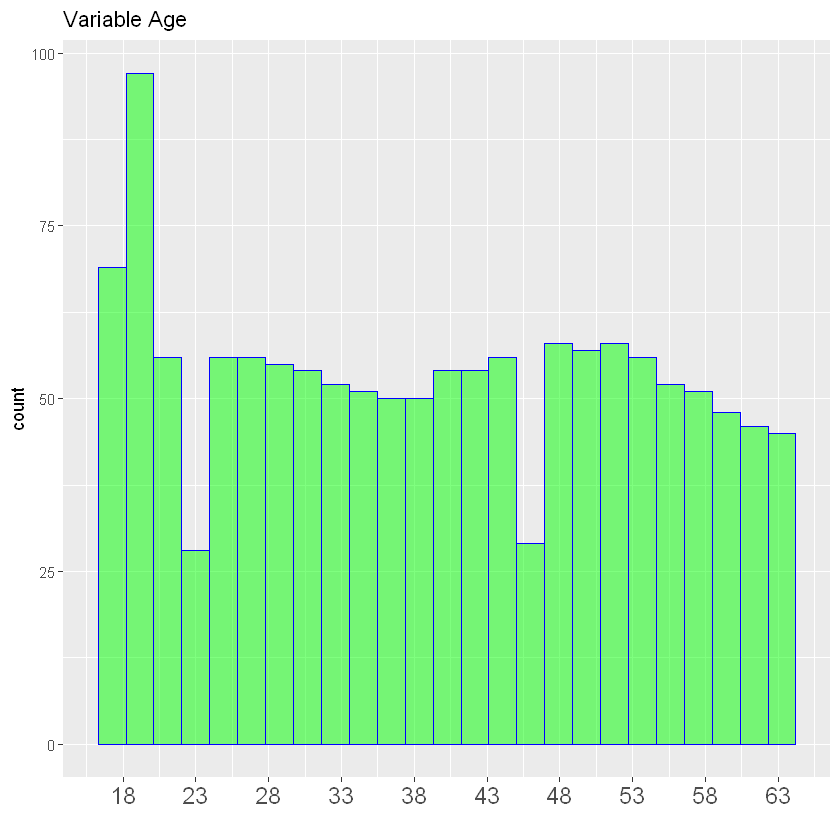

In [12]:
# Distribution Variable Age
df_insurance %>%
ggplot(aes(age)) +
geom_histogram(color = "blue", fill = "green",alpha = .5, bins = 25) +
scale_x_continuous(breaks = seq(18,64,5)) +
theme(axis.text.x = element_text(size = 14)) +
labs(title="Variable Age", x="")

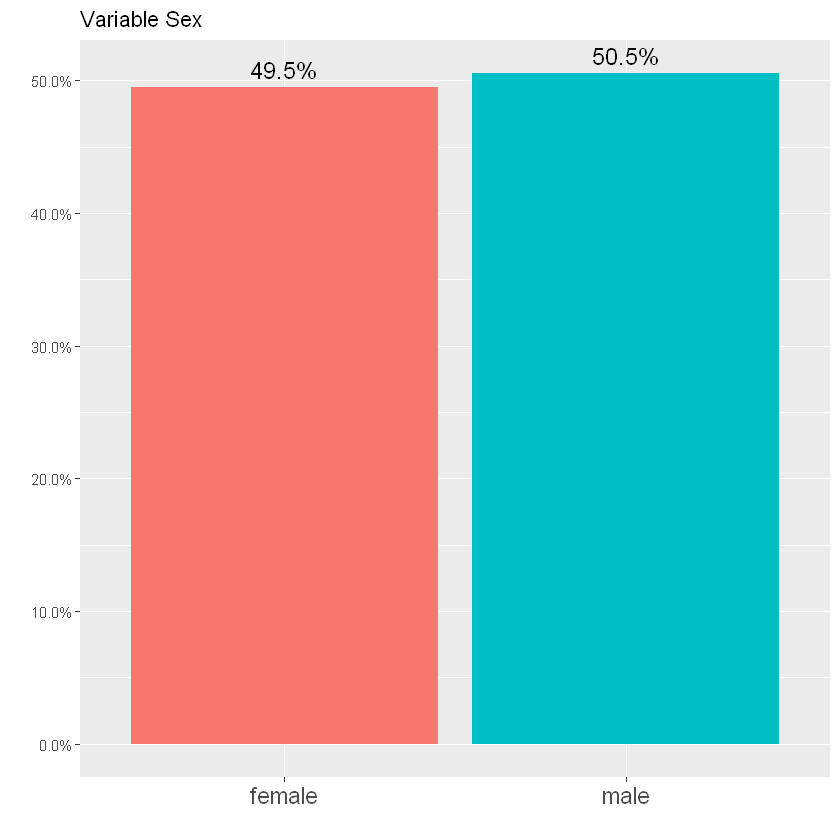

In [13]:
# Barplot Variable Sex
df_insurance %>%
ggplot(aes(x=sex, y = prop.table(stat(count)), 
                          fill = sex, 
                          label = scales::percent(prop.table(stat(count))))) +
    geom_bar(show.legend=F) + 
    geom_text(stat = 'count',
              position = position_dodge(.9), 
              vjust = -0.5, 
              size = 5) + 
    scale_y_continuous(labels = scales::percent) +
theme(axis.text.x = element_text(size = 14)) +
labs(title="Variable Sex", x="", y="")

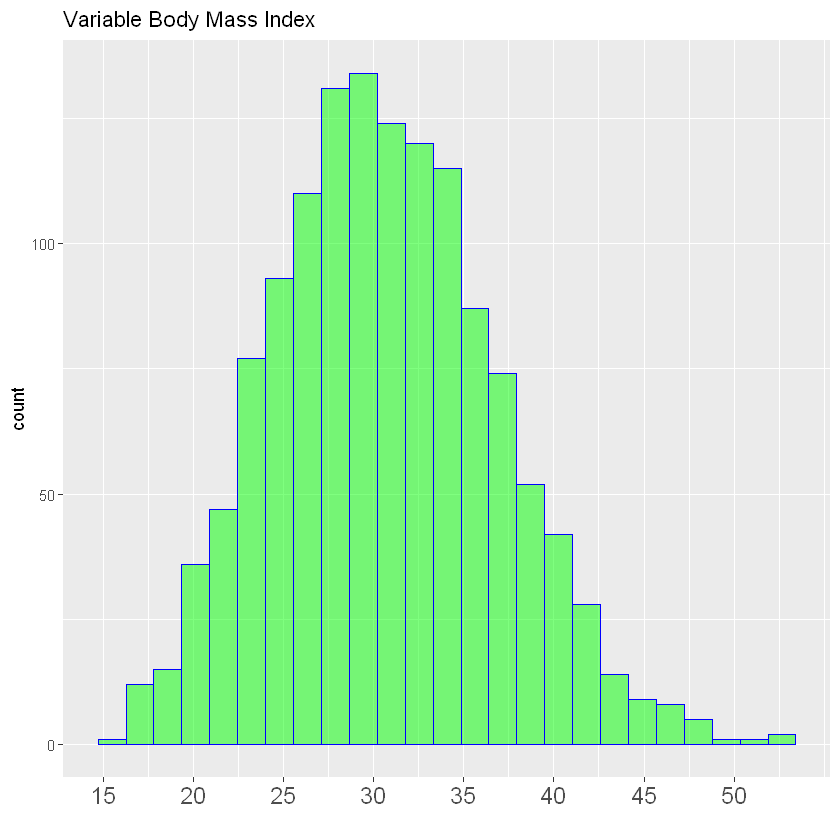

In [14]:
# Distribution Variable BMI
df_insurance %>%
ggplot(aes(bmi)) +
geom_histogram(color = "blue", fill = "green",alpha = .5, bins = 25) +
scale_x_continuous(breaks = seq(15,54,5)) +
theme(axis.text.x = element_text(size = 14)) +
labs(title="Variable Body Mass Index", x="")

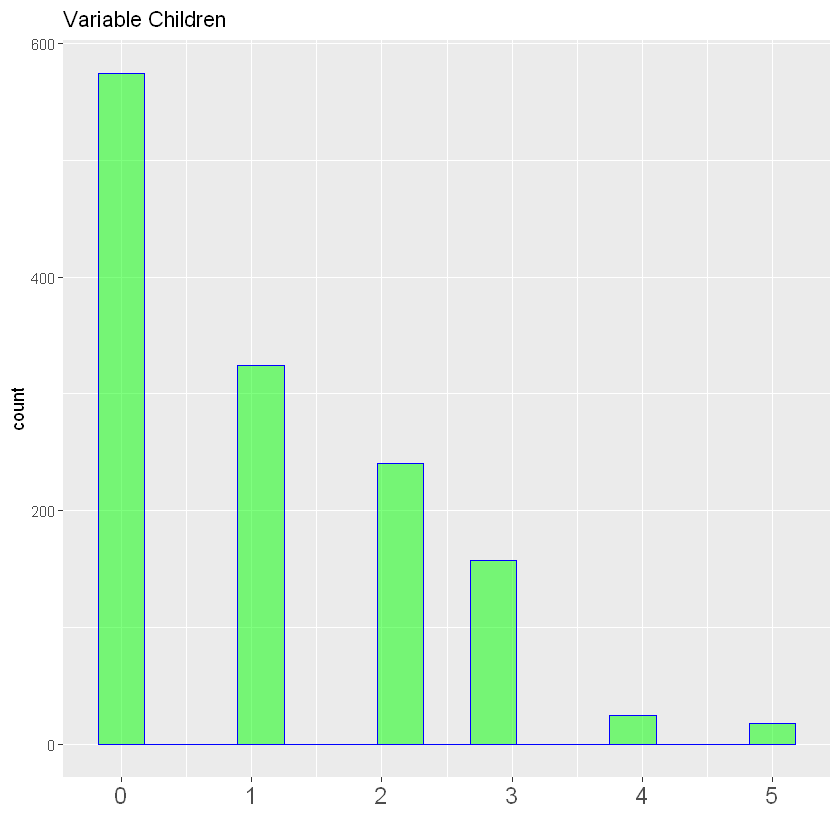

In [15]:
# Distribution Variable Children
df_insurance %>%
ggplot(aes(children)) +
geom_histogram(color = "blue", fill = "green",alpha = .5, bins = 15) +
scale_x_continuous(breaks = seq(0,5,1)) +
theme(axis.text.x = element_text(size = 14)) +
labs(title="Variable Children", x="")

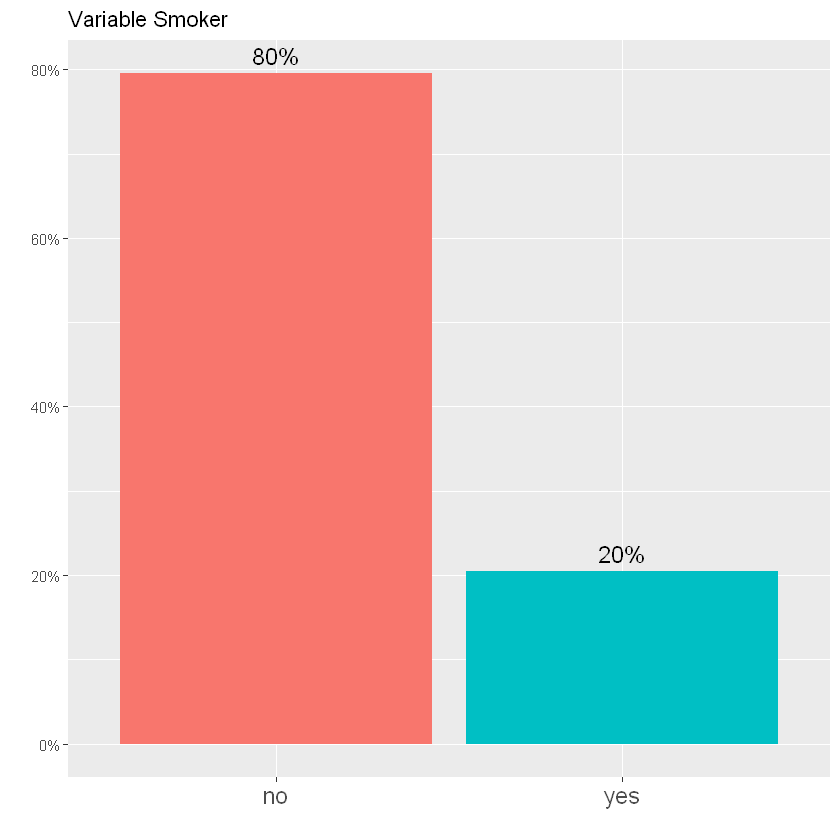

In [16]:
# Barplot Variable Smoker
df_insurance %>%
ggplot(aes(x=smoker, y = prop.table(stat(count)), 
                          fill = smoker, 
                          label = scales::percent(prop.table(stat(count))))) +
    geom_bar(show.legend=F) + 
    geom_text(stat = 'count',
              position = position_dodge(.9), 
              vjust = -0.5, 
              size = 5) + 
    scale_y_continuous(labels = scales::percent) +
theme(axis.text.x = element_text(size = 14)) +
labs(title="Variable Smoker", x="", y="")

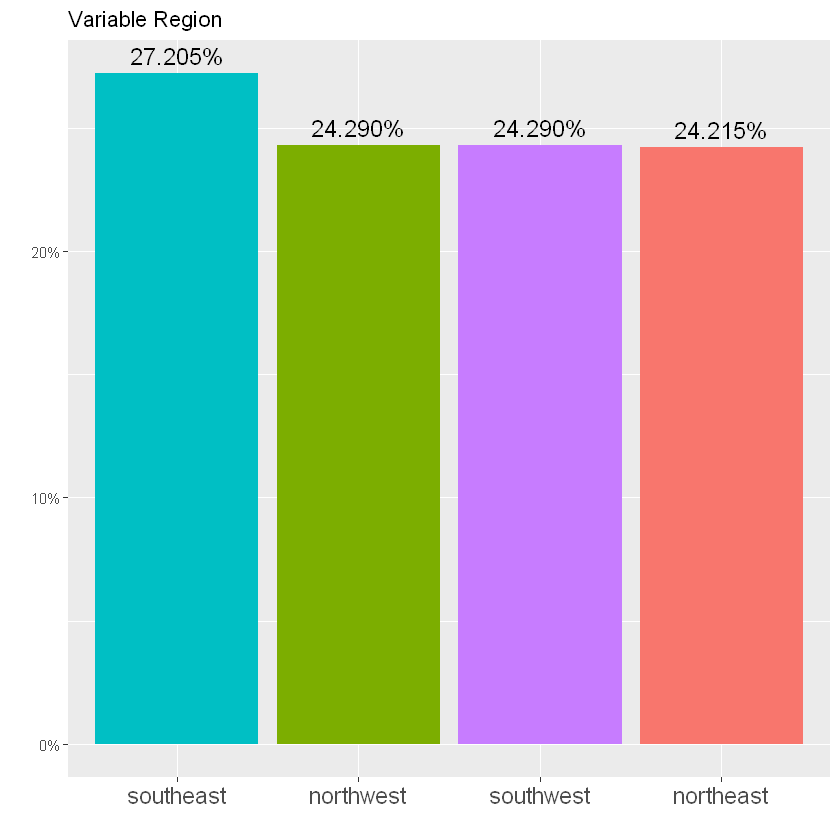

In [17]:
# Boxplot Variable Region
df_insurance %>%
ggplot(aes(reorder(region, region,
                     function(x)-length(x)),
                   y = prop.table(stat(count)), 
                          fill = region, 
                          label = scales::percent(prop.table(stat(count))))) +
    geom_bar(show.legend=F) + 
    geom_text(stat = 'count',
              position = position_dodge(.9), 
              vjust = -0.5, 
              size = 5) + 
    scale_y_continuous(labels = scales::percent) +
theme(axis.text.x = element_text(size = 14)) +
labs(title="Variable Region", x="", y="")

 ### 2.2 RELATION VARIABLE CHARGES WITH OTHERS VARIABLES

`geom_smooth()` using formula 'y ~ x'



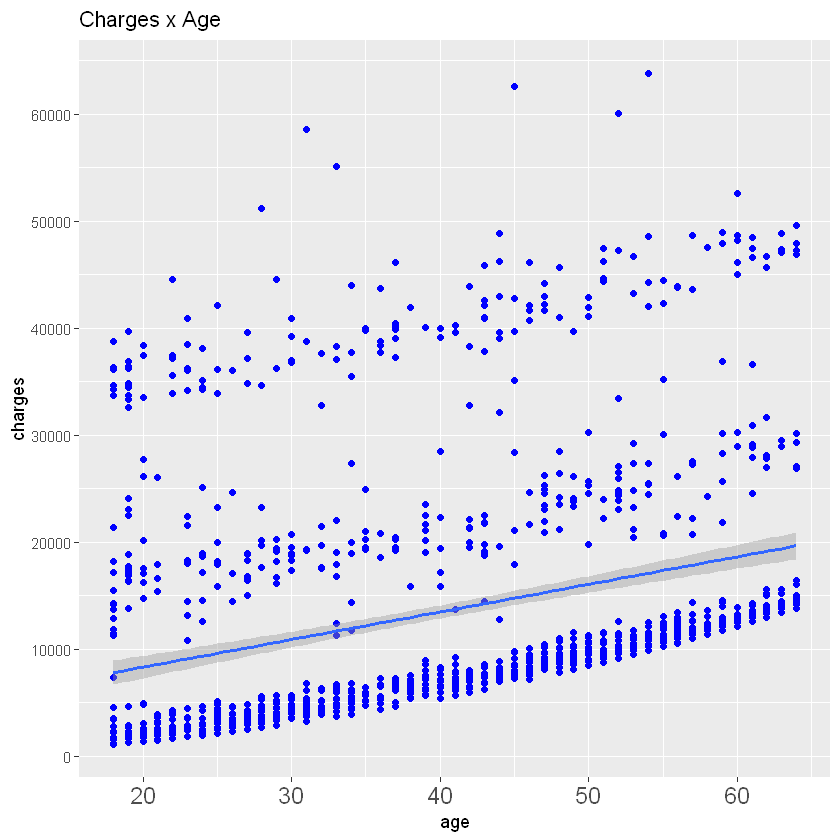

In [18]:
# Scatterplot Charges and Age
df_insurance %>%
ggplot(aes(age, charges)) +
geom_point(colour="blue") +
geom_smooth(method = "lm") +
scale_y_continuous(breaks = seq(0,64000,10000)) +
theme(axis.text.x = element_text(size = 14)) +
labs(title="Charges x Age")

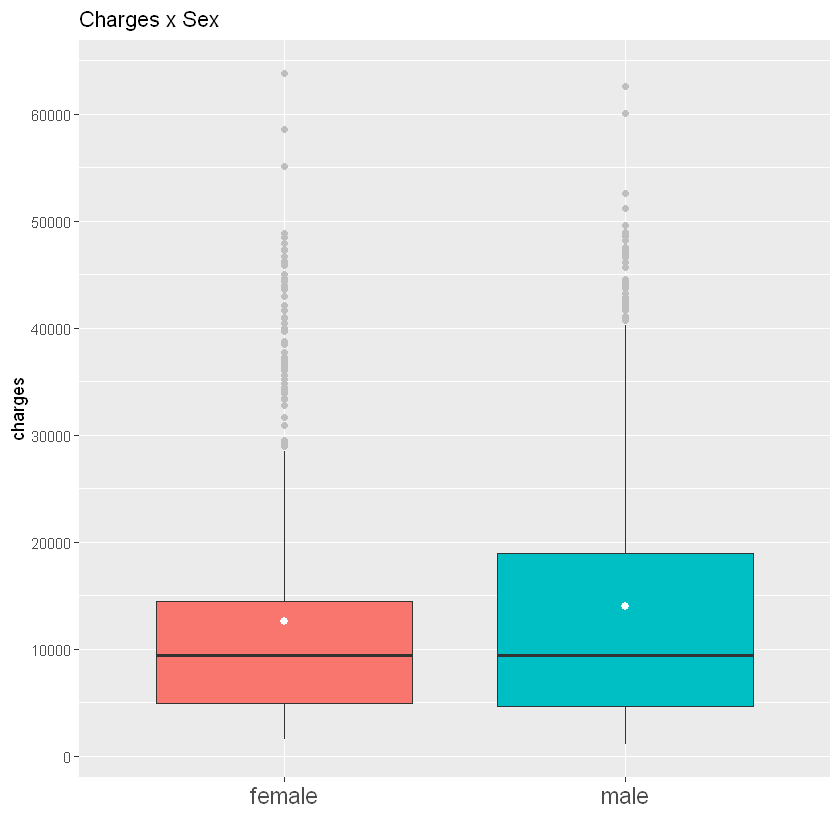

In [19]:
# Boxplot Charges and Sex 
df_insurance %>%
ggplot(aes(sex, charges, fill = sex)) +
geom_boxplot(show.legend=F, outlier.colour = "gray") +
scale_y_continuous(breaks = seq(0,64000,10000)) +
 stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
theme(axis.text.x = element_text(size = 14)) +
labs(title="Charges x Sex", x="")

`geom_smooth()` using formula 'y ~ x'



List of 2
 $ axis.text.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 14
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ title      : chr "Charges x Bmi"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

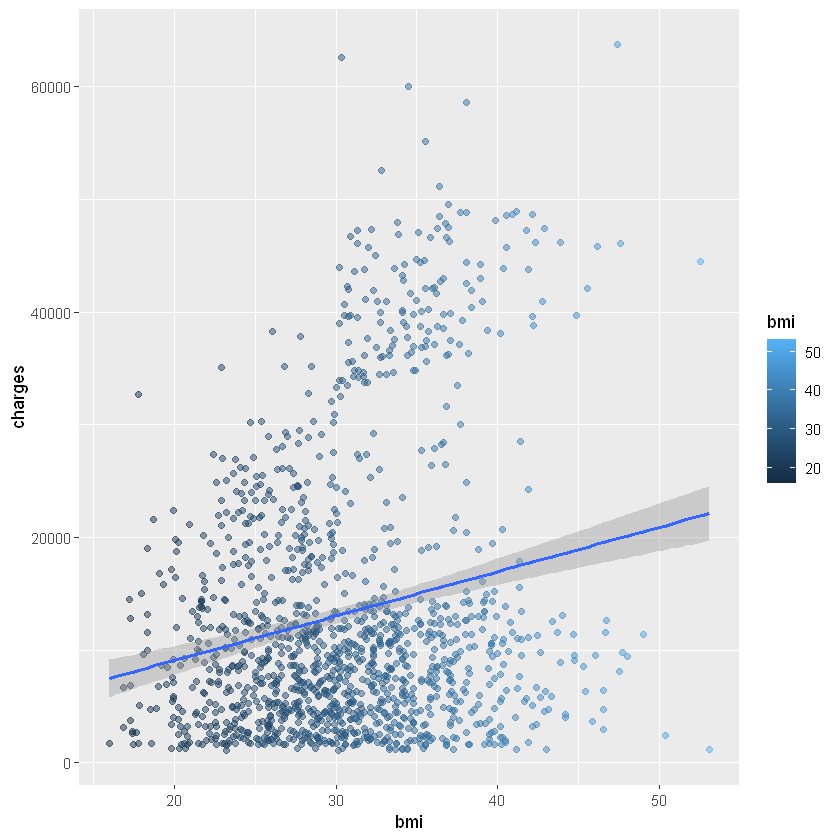

In [20]:
# Scatterplot Charges and BMI
df_insurance %>%
ggplot(aes(bmi, charges, colour=bmi)) +
geom_point(alpha=.5) +
geom_smooth(method="lm")
theme(axis.text.x = element_text(size = 14)) +
labs(title="Charges x Bmi")

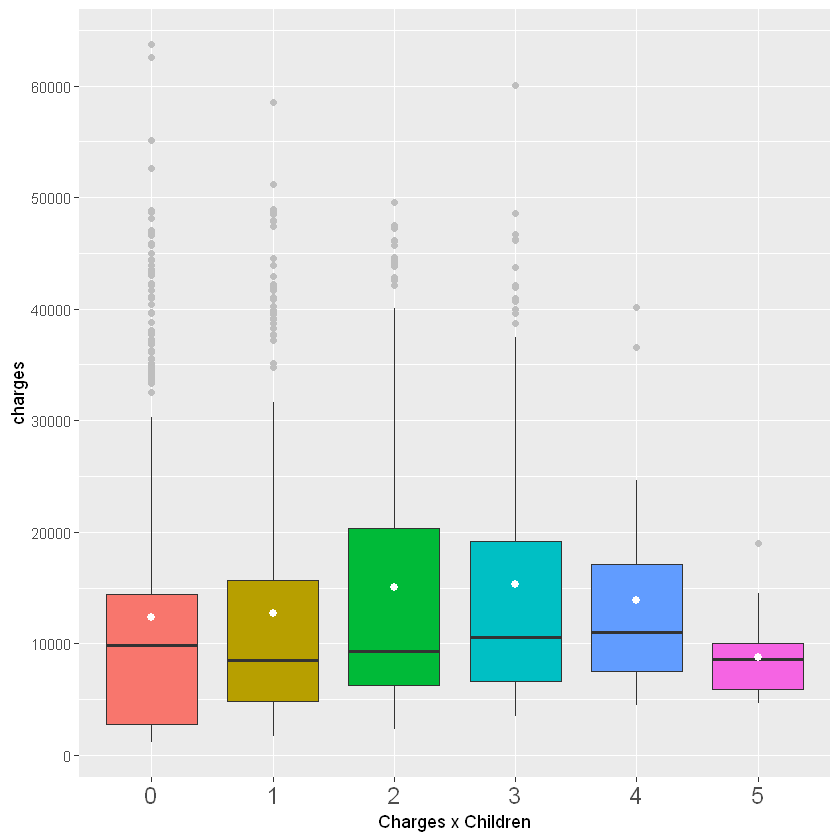

In [21]:
# Boxplot Charges and Children
df_insurance %>%
ggplot(aes(factor(children), charges, fill = factor(children))) +
geom_boxplot(show.legend=F, outlier.colour = "gray") +
scale_y_continuous(breaks = seq(0,64000,10000)) +
 stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
theme(axis.text.x = element_text(size = 14)) +
labs(x="Charges x Children")

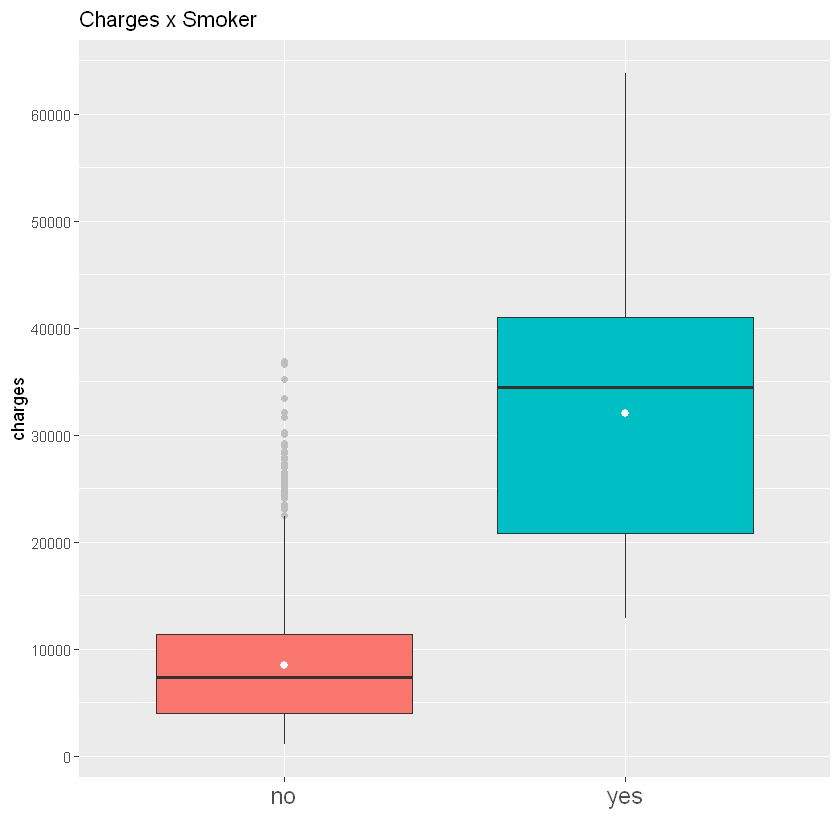

In [22]:
# Boxplot Charges and Smoker
df_insurance %>%
ggplot(aes(smoker, charges, fill = smoker)) +
geom_boxplot(show.legend=F, outlier.colour = "gray") +
scale_y_continuous(breaks = seq(0,64000,10000)) +
 stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
theme(axis.text.x = element_text(size = 14)) +
labs(title="Charges x Smoker", x="")

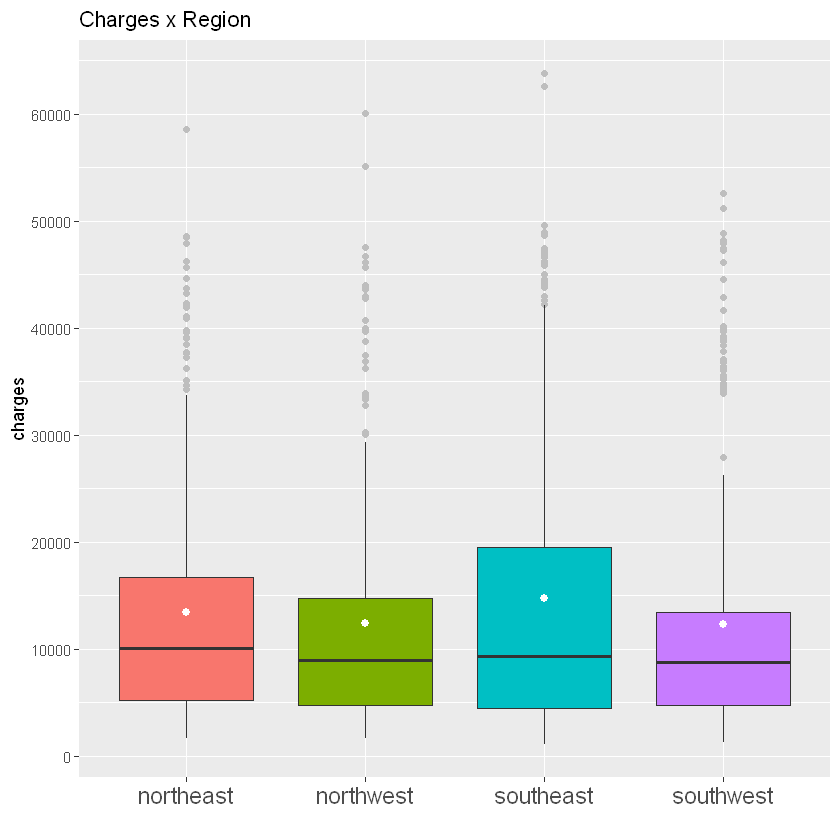

In [23]:
# Scatterplot Charges and Region
df_insurance %>%
ggplot(aes(region, charges, fill = region)) +
geom_boxplot(show.legend=F, outlier.colour = "gray") +
scale_y_continuous(breaks = seq(0,64000,10000)) +
 stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
theme(axis.text.x = element_text(size = 14)) +
labs(title="Charges x Region", x="")

CORRELATION MATRIX -> With a correlation matrix we can visualize the relationship between the dependent variable and the independent variables, as well as between them.

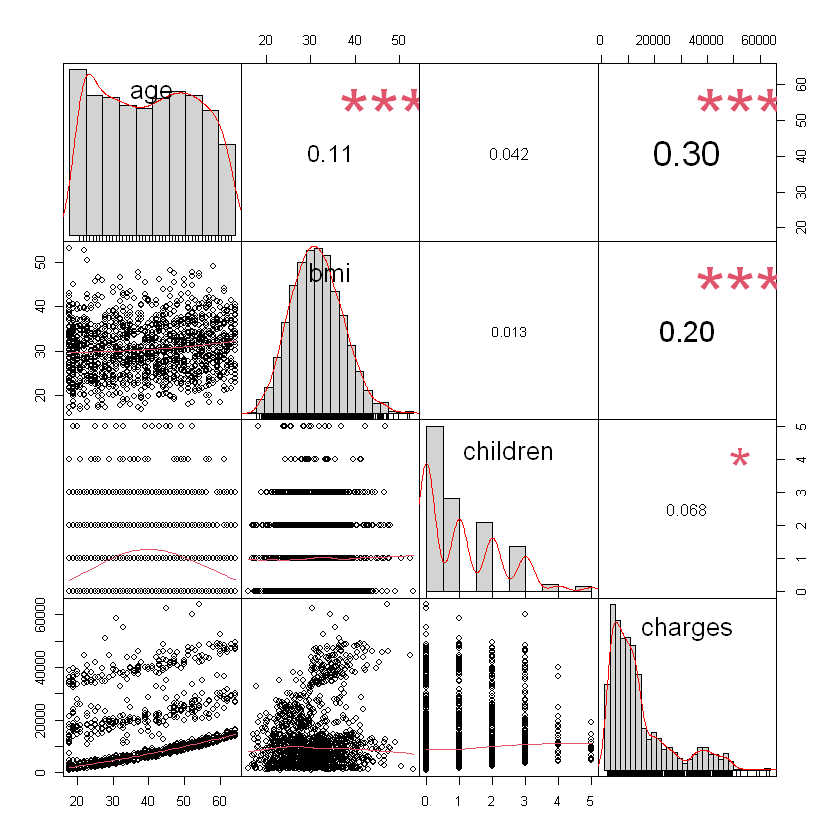

In [24]:
# The correlation matrix
df_insurance %>%
select(age, bmi, children, charges) %>%
chart.Correlation()

## 3. MODELING

In [25]:
# New variables 
df_insurance$age2<- df_insurance$age^2
df_insurance$bmi30 <- ifelse(df_insurance$bmi >= 30 , 1, 0)
df_insurance$bmi35 <- ifelse(df_insurance$bmi >= 35 , 1, 0)

In [26]:
# Split dataset
set.seed(123)
split<- sample.split(df_insurance$charges, SplitRatio = 0.7)
df_train<- subset(df_insurance, split == T)
df_test<- subset(df_insurance, split == F)

In [27]:
# Define training control
train.control <- trainControl(method = "repeatedcv", 
                              number = 10, repeats = 3)

MODEL 1 -> consists of the dependent variable **Charges** and the six independent variables **Age**, **Sex**, **BMI**, **Children**, **Smoker** and **Region**.

In [28]:
# Model 1
model1<- train(charges ~., df_train, method = "lm",
               trControl = train.control)

In [29]:
# Summary model 1
summary(model1)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-12637.2  -3426.0    -82.5   1597.2  29429.0 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -3872.486   2574.381  -1.504 0.132861    
age               -58.878    101.336  -0.581 0.561370    
sexmale          -592.181    414.429  -1.429 0.153368    
bmi               227.224     73.266   3.101 0.001985 ** 
children          693.763    177.640   3.905 0.000101 ***
smokeryes       24381.806    505.045  48.277  < 2e-16 ***
regionnorthwest  -573.283    596.017  -0.962 0.336373    
regionsoutheast -1169.018    589.033  -1.985 0.047480 *  
regionsouthwest -1289.639    587.602  -2.195 0.028430 *  
age2                3.991      1.258   3.172 0.001562 ** 
bmi30            2084.932    700.445   2.977 0.002991 ** 
bmi35              31.278    744.119   0.042 0.966481    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual stan

In [30]:
# RMSE Rsquared and MAE Model 1
print(model1)

Linear Regression 

936 samples
  9 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 843, 842, 844, 843, 844, 843, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  6270.671  0.7551022  4449.12

Tuning parameter 'intercept' was held constant at a value of TRUE


MODEL 2 -> We observed earlier, when comparing the variables **Charges** and **Age**, that there is a greater medical expense when age increases. Then, we will add a new age variable to the model (**age^2**), in order to capture this non-linear relationship.

In [31]:
# Model 2
model2 <- train(charges ~ age + age2 + children + bmi + sex + smoker + region,
             df_train, method="lm", trControl=train.control)

In [32]:
# Summary model 2
summary(model2)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-11987.2  -2979.0   -891.6   1612.2  30533.2 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -6806.709   2143.631  -3.175 0.001546 ** 
age               -73.352    101.491  -0.723 0.470020    
age2                4.185      1.259   3.322 0.000927 ***
children          701.379    178.122   3.938 8.85e-05 ***
bmi               365.974     34.983  10.462  < 2e-16 ***
sexmale          -559.158    415.871  -1.345 0.179101    
smokeryes       24416.649    506.502  48.206  < 2e-16 ***
regionnorthwest  -512.316    597.531  -0.857 0.391452    
regionsoutheast -1274.979    589.863  -2.161 0.030914 *  
regionsouthwest -1264.232    589.353  -2.145 0.032203 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6290 on 926 degrees of freedom
Multiple R-squared:  0.7567,	Adjusted R-squared:  0.7544 
F-statistic: 32

In [33]:
# RMSE Rsquared and MAE Model 2
print(model2)

Linear Regression 

936 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 844, 842, 844, 842, 841, 841, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6307.759  0.7528717  4390.017

Tuning parameter 'intercept' was held constant at a value of TRUE


MODEL 3-> We will transform the **BMI** variable into binary to indicate an obesity condition (BMI> = 30), in order to capture the relationship between obesity and higher medical expenses.

In [34]:
# Model 3
model3 <- train(charges ~ age + age2 + children + sex + bmi + bmi30 + smoker + region,
             df_train, method="lm", trControl=train.control)

In [35]:
# Summary model 3
summary(model3)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-12622.6  -3414.0    -88.4   1605.7  29423.1 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -3917.594   2338.782  -1.675  0.09426 .  
age               -59.087    101.159  -0.584  0.55930    
age2                3.994      1.256   3.181  0.00152 ** 
children          693.427    177.365   3.910 9.92e-05 ***
sexmale          -592.229    414.203  -1.430  0.15311    
bmi               229.150     57.138   4.010 6.55e-05 ***
bmi30            2079.584    688.422   3.021  0.00259 ** 
smokeryes       24382.599    504.420  48.338  < 2e-16 ***
regionnorthwest  -574.219    595.279  -0.965  0.33499    
regionsoutheast -1168.152    588.356  -1.985  0.04739 *  
regionsouthwest -1290.590    586.849  -2.199  0.02811 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6262 on 925 degrees of freedom
Multiple R-squa

In [36]:
# RMSE Rsquared and MAE Model 3
print(model3)

Linear Regression 

936 samples
  8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 844, 842, 842, 844, 842, 842, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  6283.253  0.7534437  4445.504

Tuning parameter 'intercept' was held constant at a value of TRUE


MODEL 4 -> Sometimes, we can assume that it makes sense to test the combined effect of two variables, we will build a model with the interaction between the variable **BMI30** and **Smoker**.

In [37]:
#Model 4
model4 <- train(charges ~ age + age2 + children + bmi + sex + bmi30*smoker + region,
             df_train, method="lm", trControl=train.control)

In [38]:
# Summary model 4
summary(model4)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-16960.5  -1865.3  -1281.7   -579.8  24244.2 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         586.7597  1739.0034   0.337 0.735883    
age                 -61.9621    74.8861  -0.827 0.408214    
age2                  4.1010     0.9295   4.412 1.14e-05 ***
children            769.7133   131.3283   5.861 6.40e-09 ***
bmi                 145.7856    42.4053   3.438 0.000612 ***
sexmale            -770.7463   306.6939  -2.513 0.012137 *  
bmi30             -1490.4726   525.7385  -2.835 0.004682 ** 
smokeryes         12971.9782   556.6654  23.303  < 2e-16 ***
regionnorthwest    -696.4558   440.6947  -1.580 0.114367    
regionsoutheast   -1163.9562   435.5471  -2.672 0.007664 ** 
regionsouthwest   -1814.0681   434.8447  -4.172 3.31e-05 ***
`bmi30:smokeryes` 20615.7678   745.8925  27.639  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.0

In [39]:
# RMSE Rsquared and MAE Model 4
print(model4)

Linear Regression 

936 samples
  8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 842, 844, 842, 842, 843, 842, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  4619.906  0.8637909  2597.382

Tuning parameter 'intercept' was held constant at a value of TRUE


MODEL 5 -> Now, we will test whether a BMI index greater than 35 (variable **BMI35**) is more significant.

In [40]:
# Model 5
model5 <- train(charges ~ age + age2 + children + bmi + sex + bmi35*smoker + region,
             df_train, method="lm", trControl=train.control)

In [41]:
# Summary model 5
summary(model5)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
 -8903  -2733  -1388     71  33704 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -5810.177   2098.703  -2.768 0.005745 ** 
age                 -83.154     91.817  -0.906 0.365361    
age2                  4.372      1.140   3.837 0.000133 ***
children            632.444    161.252   3.922 9.43e-05 ***
bmi                 368.438     46.023   8.006 3.56e-15 ***
sexmale            -522.918    375.945  -1.391 0.164578    
bmi35             -3680.344    702.355  -5.240 1.99e-07 ***
smokeryes         20510.874    532.145  38.544  < 2e-16 ***
regionnorthwest    -649.144    540.704  -1.201 0.230232    
regionsoutheast   -1586.854    534.229  -2.970 0.003051 ** 
regionsouthwest   -1277.166    533.183  -2.395 0.016802 *  
`bmi35:smokeryes` 14916.720   1031.971  14.455  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residua

In [42]:
# RMSE Rsquared and MAE Model 5
print(model5)

Linear Regression 

936 samples
  8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 842, 843, 840, 843, 843, 844, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  5708.793  0.7997272  3761.934

Tuning parameter 'intercept' was held constant at a value of TRUE


MODEL SELECT -> We will use too Akaike information criterion (AIC) and Bayesian information criterion (BIC) to select the best model 

In [43]:
# Comparing models with AIC
AIC(model1$finalModel, model2$finalModel, model3$finalModel, model4$finalModel, model5$finalModel)

,df,AIC
,<dbl>,<dbl>
model1$finalModel,13,19036.80
model2$finalModel,11,19041.99
model3$finalModel,12,19034.80
model4$finalModel,13,18472.83
model5$finalModel,13,18854.92


In [44]:
# Comparing models with BIC
BIC(model1$finalModel, model2$finalModel, model3$finalModel, model4$finalModel, model5$finalModel)

,df,BIC
,<dbl>,<dbl>
model1$finalModel,13,19099.74
model2$finalModel,11,19095.25
model3$finalModel,12,19092.90
model4$finalModel,13,18535.77
model5$finalModel,13,18917.87


## 4. MAKING PREDICTIONS

In [45]:
# Make new variable prediction
df_test$pred <- predict(model4, df_test)


In [46]:
# Correlation model
cor(df_test$pred, df_test$charges)

[1] 0.9255828

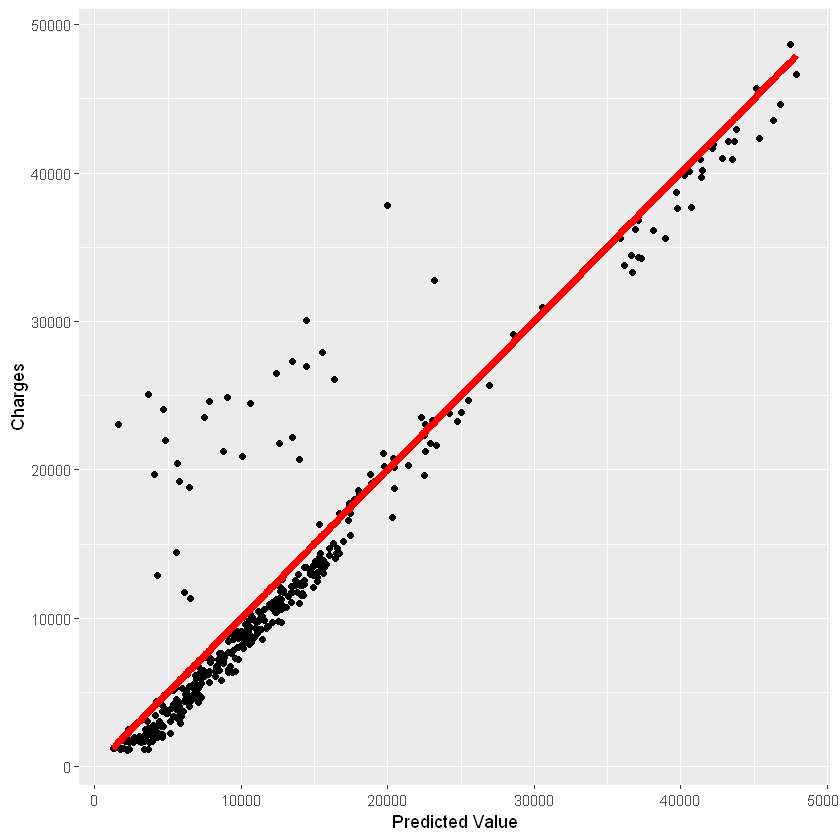

In [47]:
# Graph of correlation between the predicted and actual
df_test %>%
ggplot(aes(pred, charges)) +
geom_point() +
geom_line(aes(y=pred), color = "red", size = 2) +
labs(x="Predicted Value", y="Charges")


MEDICAL EXPENSES -> predictions of values from some characteristics.

In [48]:
# Prediction 1
predict(model4, data.frame(age = 35, age2 = 35^2, children = 3,
                           bmi = 30, sex = "male", bmi30 = 1,
                           smoker = "no", region = "northeast"))

1 
7863.264

In [49]:
# Prediction 2
predict(model4, data.frame(age = 55, age2 = 55^2, children = 0,
                           bmi = 25, sex = "male", bmi30 = 0,
                           smoker = "yes", region = "northeast"))

1 
25430.15

In [50]:
# Prediction 3
predict(model4, data.frame(age = 70, age2 = 70^2, children = 2,
                           bmi = 35, sex = "female", bmi30 = 1,
                           smoker = "no", region = "southeast"))

1 
20331.66

In [51]:
# Prediction 4
predict(model4, data.frame(age = 22, age2 = 22^2, children = 4,
                           bmi = 23, sex = "female", bmi30 = 0,
                           smoker = "yes", region = "northwest"))

1 
19915.91

PREDICTION 1 -> 35-year-old man, non-smoker, obese and with three children, resident of the Northeast region of the USA: **US$7863.264** 

PREDICTION 2 -> 55-year-old man, smoker, non-obese and without children, resident of the Northeast region of the USA: **US$25430.15**

PREDICTION 3 -> 70-year-old woman, non-smoker, obese and with two children, resident of the southeastern USA: **US$20331.66** 

PREDICTION 4 -> 22-year-old woman, smoker, non-obese and with 4 children, resident of the northwestern region of the USA **US$19915.91** <br>

## 5. CONCLUSION

When comparing the models, we notice that model 4 has the highest value of Adjusted R-squared 0.8666 and the p-value shows a significant relationship. Model 5 has a value of 0.7993, with the other models having values of 0.75. Model 4 also has the lowest values in AIC and BIC, respectively, 18472.83 and 18535.77. And RMSE 4619,906. For these reasons, we chose model 4 and made some predictions in order to show, in a practical way, the estimated values of medical expenses given some characteristics of the individuals.

DIEGO RAMIREZ <br>
daarfarias@hotmail.com <br>
https://github.com/daarfarias